# Identification of Criminal Activity Hotspots using Machine Learning to aid in Effective Utilization of Police Patrolling in Cities with High Crime Rates - *Source Code Notebook*

#### Source of Data
* [Dataset Link](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2/data)
* All records taken from 01 Jan 2012 - 05 May 2019

In [2]:
# Loading the necessary libraries

import pandas as pd
import sys
sys.path.append("../utils/")
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import seaborn as sns

import util_script as us

## Data Acquisition - Obtain Data

In [3]:
'''Let's write code to automate the creating of our dataset'''

DATA_PATH = "../data/"

file_names = ['crimes_2015.csv','crimes_2016.csv','crimes_2017.csv','crimes_2018.csv','crimes_2019.csv']
file_names = [DATA_PATH+x for x in file_names]

main_df = us.create_df(file_names)
orig_shape = main_df.shape
print("The Number of Crimes: "+ str(main_df.shape[0]))
print("\nThe Columns: "+ str(main_df.shape[1]))

Finished Loading Chicago Crime Dataset File for the year 2015.
Finished loading Chicago Crime Dataset file for the year 2016.
Finished loading Chicago Crime Dataset file for the year 2017.
Finished loading Chicago Crime Dataset file for the year 2018.
Finished loading Chicago Crime Dataset file for the year 2019.
All data files loaded onto the Main Dataframe.


The Number of Crimes: 1146382

The Columns: 22


In [26]:
# Information about the main dataframe
main_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1129772 entries, 1 to 1146381
Data columns (total 25 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   ID                    1129772 non-null  int64         
 1   Case Number           1129772 non-null  object        
 2   Date                  1129772 non-null  datetime64[ns]
 3   Block                 1129772 non-null  object        
 4   IUCR                  1129772 non-null  object        
 5   Primary Type          1129772 non-null  object        
 6   Description           1129772 non-null  object        
 7   Location Description  1129772 non-null  object        
 8   Arrest                1129772 non-null  bool          
 9   Domestic              1129772 non-null  bool          
 10  Beat                  1129772 non-null  int64         
 11  District              1129772 non-null  float64       
 12  Ward                  1129772 non-null  fl

<AxesSubplot:>

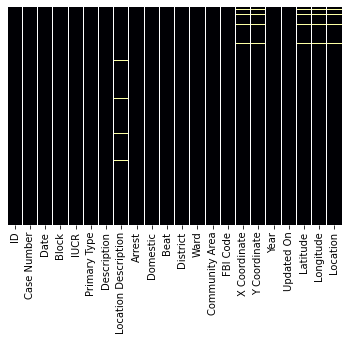

In [5]:
# Visualizing Missing Values
sns.heatmap(data = main_df.isna(), yticklabels=False, cbar=False, cmap='inferno')

In [6]:
# To drop the rows with missing data
main_df = main_df.dropna()
main_df.isna().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

The above dropping of rows does not cause too much of data loss as shown below :

In [7]:
# Inspecting the loss of data after such cleaning
print("Data Retained after Cleaning:",round(((main_df.shape[0]/orig_shape[0]) * 100),2),"%")

Data Retained after Cleaning: 98.55 %


In [8]:
# First 10 rows (instances) of our dataset
main_df.head(10)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
1,10365064,HZ100370,12/31/2015 11:59:00 PM,075XX S EMERALD AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,17.0,68.0,14,1172605.0,1854931.0,2015,02/10/2018 03:50:01 PM,41.757367,-87.642993,"(41.757366519, -87.642992854)"
2,10364662,HZ100006,12/31/2015 11:55:00 PM,079XX S STONY ISLAND AVE,0430,BATTERY,AGGRAVATED: OTHER DANG WEAPON,STREET,False,False,...,8.0,45.0,04B,1188223.0,1852840.0,2015,02/10/2018 03:50:01 PM,41.751270,-87.585822,"(41.751270452, -87.585822373)"
3,10364740,HZ100010,12/31/2015 11:50:00 PM,024XX W FARGO AVE,0820,THEFT,$500 AND UNDER,APARTMENT,False,False,...,50.0,2.0,06,1158878.0,1949369.0,2015,02/10/2018 03:50:01 PM,42.016804,-87.690709,"(42.016804165, -87.690708662)"
4,10364683,HZ100002,12/31/2015 11:50:00 PM,037XX N CLARK ST,0460,BATTERY,SIMPLE,SIDEWALK,True,False,...,44.0,6.0,08B,1167786.0,1925033.0,2015,02/10/2018 03:50:01 PM,41.949837,-87.658635,"(41.949837364, -87.658635101)"
5,10365142,HZ100722,12/31/2015 11:45:00 PM,001XX E WACKER DR,0880,THEFT,PURSE-SNATCHING,SIDEWALK,False,False,...,42.0,32.0,06,1177683.0,1902638.0,2015,02/10/2018 03:50:01 PM,41.888165,-87.622937,"(41.888165132, -87.622937212)"
6,10365005,HZ100487,12/31/2015 11:45:00 PM,001XX E WACKER DR,0820,THEFT,$500 AND UNDER,STREET,False,False,...,42.0,32.0,06,1177683.0,1902638.0,2015,02/10/2018 03:50:01 PM,41.888165,-87.622937,"(41.888165132, -87.622937212)"
7,10366580,HZ102701,12/31/2015 11:45:00 PM,050XX W CONCORD PL,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,...,37.0,25.0,14,1142595.0,1910502.0,2015,02/10/2018 03:50:01 PM,41.910470,-87.751597,"(41.910469677, -87.751597381)"
8,10364809,HZ100034,12/31/2015 11:42:00 PM,004XX E RANDOLPH ST,4387,OTHER OFFENSE,VIOLATE ORDER OF PROTECTION,APARTMENT,False,True,...,42.0,32.0,26,1179325.0,1901333.0,2015,02/10/2018 03:50:01 PM,41.884547,-87.616947,"(41.884546689, -87.616947314)"
9,10364668,HY556628,12/31/2015 11:41:00 PM,048XX S JUSTINE ST,4387,OTHER OFFENSE,VIOLATE ORDER OF PROTECTION,APARTMENT,True,True,...,20.0,61.0,26,1166823.0,1872564.0,2015,02/10/2018 03:50:01 PM,41.805879,-87.663680,"(41.805879049, -87.663679798)"
10,10364943,HZ100396,12/31/2015 11:30:00 PM,003XX W 25TH PL,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,...,11.0,34.0,14,1174442.0,1887387.0,2015,02/10/2018 03:50:01 PM,41.846388,-87.635295,"(41.846388365, -87.635294564)"


In [9]:
# What are the features of our dataset?
print(main_df.columns)

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')


## Data Cleaning - Scrub Data

In [10]:
""" Function to Clean the 'Date' feature """

def time_convert(date_time):
    s1 = date_time[:11]
    s2 = date_time[11:]
    
    month = s1[:2]
    date = s1[3:5]
    year = s1[6:10]
    
    hr = s2[:2]
    mins = s2[3:5]
    sec = s2[6:8]
    time_frame = s2[9:]
    if(time_frame == 'PM'):
        if (int(hr) != 12):
            hr = str(int(hr) + 12)
    else:
        if(int(hr) == 12):
            hr = '00'
    
    final_date = datetime(int(year), int(month), int(date), int(hr), int(mins), int(sec))
    return final_date

In [11]:
# Using apply() of pandas to apply time_convert on every row of the Date column
main_df['Date'] = main_df['Date'].apply(time_convert)

In [12]:
# Inspect the cleaned "Date" column
main_df['Date'].head()

1   2015-12-31 23:59:00
2   2015-12-31 23:55:00
3   2015-12-31 23:50:00
4   2015-12-31 23:50:00
5   2015-12-31 23:45:00
Name: Date, dtype: datetime64[ns]

In [15]:
""" Feature Engineering - Splitting the 'Date' feature into more suitable features for a Time-based analysis"""

# Feature Engineering 1 : Month
def month_col(x):
    return int(x.strftime("%m"))
main_df['Month'] = main_df['Date'].apply(month_col)

# Feature Engineering 2 : Day
def day_col(x):
    return int(x.strftime("%w"))
main_df['Day'] = main_df['Date'].apply(day_col)  

# Feature Engineering 3 : Hour
def hour_col(x):
    return int(x.strftime("%H"))
main_df['Hour'] = main_df['Date'].apply(hour_col)

In [16]:
# Inspect the latest version of the dataset

main_df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Month,Day,Hour
1,10365064,HZ100370,2015-12-31 23:59:00,075XX S EMERALD AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,1172605.0,1854931.0,2015,02/10/2018 03:50:01 PM,41.757367,-87.642993,"(41.757366519, -87.642992854)",12,4,23
2,10364662,HZ100006,2015-12-31 23:55:00,079XX S STONY ISLAND AVE,0430,BATTERY,AGGRAVATED: OTHER DANG WEAPON,STREET,False,False,...,1188223.0,1852840.0,2015,02/10/2018 03:50:01 PM,41.751270,-87.585822,"(41.751270452, -87.585822373)",12,4,23
3,10364740,HZ100010,2015-12-31 23:50:00,024XX W FARGO AVE,0820,THEFT,$500 AND UNDER,APARTMENT,False,False,...,1158878.0,1949369.0,2015,02/10/2018 03:50:01 PM,42.016804,-87.690709,"(42.016804165, -87.690708662)",12,4,23
4,10364683,HZ100002,2015-12-31 23:50:00,037XX N CLARK ST,0460,BATTERY,SIMPLE,SIDEWALK,True,False,...,1167786.0,1925033.0,2015,02/10/2018 03:50:01 PM,41.949837,-87.658635,"(41.949837364, -87.658635101)",12,4,23
5,10365142,HZ100722,2015-12-31 23:45:00,001XX E WACKER DR,0880,THEFT,PURSE-SNATCHING,SIDEWALK,False,False,...,1177683.0,1902638.0,2015,02/10/2018 03:50:01 PM,41.888165,-87.622937,"(41.888165132, -87.622937212)",12,4,23


In [17]:
""" Filter the Top 10 most occuring crimes in the city of Chicago """

"""
STEPS FOLLOWED WHILE DOING THIS :

1. Take in each crime and make a dataset of it
2. Append the sub datasets to each other
"""
top_10 = list(main_df['Primary Type'].value_counts().head(10).index)
print(top_10)
def filter_top_10(df):
    df2=df[df['Primary Type']=='THEFT']
    for crime in top_10[1:]:
        temp=df[df['Primary Type']==crime]
        df2 = df2.append(temp, ignore_index=True)
    return df2


df2=filter_top_10(main_df) # the dataframe with all the data of only the top 10 crimes
df2.shape

['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'ASSAULT', 'OTHER OFFENSE', 'DECEPTIVE PRACTICE', 'NARCOTICS', 'BURGLARY', 'MOTOR VEHICLE THEFT', 'ROBBERY']


(1036588, 25)

In [18]:
1036588/1146382 * 100

90.42256420634658

**NOTE :**
Even though only the Top 10 crimes have been picked up from thw hole dataset, we see that we still have been able to retain 90.4% of all crime records. This shows how dominating these 10 crimes have been in th crime landscape of Chicago.

In [3]:
df2.head()

NameError: name 'df2' is not defined

In [2]:
# Inspecting a few relevant features

df2[['Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code', 'Location', 'X Coordinate', 'Y Coordinate']].head()

NameError: name 'df2' is not defined

<strong>What do each of the above features mean?</strong>
<br>
<ul><li><strong>Domestic :</strong> Indicates whether the incident was domestic-related as defined by the Illinois Domestic Violence Act.</li>
    <li><strong>Beat :</strong> Indicates the beat where the incident occurred. A beat is the smallest police geographic area – each beat has a dedicated police beat car. Three to five beats make up a police sector, and three sectors make up a police district. The Chicago Police Department has 22 police districts.</li>
    <li><strong>District :</strong> Indicates the police district where the incident occurred</li>
    <li><strong>Ward :</strong> The ward(City Council District) where the incident occurred</li>
    <li><strong>Community Are :</strong> Indicates the community area where the incident occurred. Chicago has 77 community areas.</li>
    <li><strong>FBI Code :</strong> Indicates the crime classification as outlined in the FBI's National Incident-Based Reporting System (NIBRS).</li>
</ul>

### Grouping all these main crimes 

- First Attempt was to use all these location-type attributes given above to understand where a crime would happen</li>
- We have used Month, Day, District and Hour features to group crimes together</li>
- A *Time Point* is defined as [***month day hour***]

In [21]:
""" Grouping """

# Creating our explicit dataset
cri5 = df2.groupby(['Month','Day','District','Hour'], as_index=False).agg({"Primary Type":"count"})
cri5 = cri5.sort_values(by=['District'], ascending=False)
cri5.head()

,Month,Day,District,Hour,Primary Type
16369,5,2,31.0,9,1
2113,1,3,31.0,10,1
12673,4,2,31.0,10,1
1584,1,2,31.0,16,1
1583,1,2,31.0,13,1


We are not including <strong>Year</strong> because it is not of prime importance in predicting a future crime. 

In [22]:
# Renaming our feature
cri6=cri5.rename(index=str, columns={"Primary Type":"Crime_Count"})
cri6.head()

,Month,Day,District,Hour,Crime_Count
16369,5,2,31.0,9,1
2113,1,3,31.0,10,1
12673,4,2,31.0,10,1
1584,1,2,31.0,16,1
1583,1,2,31.0,13,1


**A brief explanation of our cri6 dataframe :**
- **Month :** A given month (1 : January, 12 : December)
- **Day :** A given day
- **Distrct :** A given district
- **Hour :** A given hour (1 to 23)
- **Crime_Count :** The number of crimes that occured in the corresponding district during a given Time Point

**cri6** will be our main dataset for all further operations

## Exploring our Data

In [23]:
cri6 = cri6[['Month','Day','District','Hour','Crime_Count']]

print("The shape of our final dataset is:", cri6.shape)
cri6.tail()

The shape of our final dataset is: (44361, 5)


,Month,Day,District,Hour,Crime_Count
28524,8,5,1.0,4,6
28525,8,5,1.0,5,4
28526,8,5,1.0,6,12
28527,8,5,1.0,7,11
22180,7,0,1.0,0,29


In [24]:
# Viewing the maximum and minmum crime counts
print("Highest Crime Count at any district at any time point:", cri6["Crime_Count"].max())
print("Lowest Crime Count at any district at any time point:", cri6["Crime_Count"].min())

Highest Crime Count at any district at any time point: 93
Lowest Crime Count at any district at any time point: 1


In [37]:
print("Average no. of crimes per ditrict per time point :",round(cri6['Crime_Count'].sum()/cri6.shape[0], 2))

Average no. of crimes per ditrict per time point : 23.37


In [33]:
# Inspecting our own lower and upper bounds to make a target feature "Alarm"

lower = np.mean(cri6['Crime_Count'])-0.75*np.std(cri6['Crime_Count'])
higher = np.mean(cri6['Crime_Count'])+0.75*np.std(cri6['Crime_Count'])
print(lower, higher)

13.96855215504785 32.765651311961456


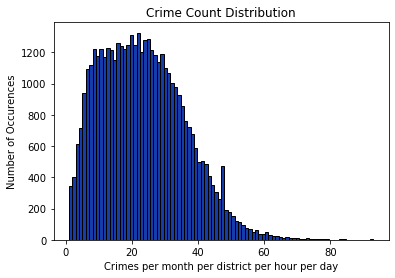

In [38]:
# Crime Count Distribution plot (We need to be using this plot in order to devise our target feature, "Alarm")

plt.hist(x='Crime_Count', data=cri6,bins=90,linewidth=1,edgecolor='black', color='#163ca9')
#plt.title("Distribution of Crimes in Chicago", fontfamily="Agency FB", fontsize=25)
plt.xlabel("Crimes per month per district per hour per day")
plt.ylabel("Number of Occurences")
plt.title("Crime Count Distribution")
plt.savefig("../results/plots/Distribution of crimes.png")

In [1]:
# 0-14 : Low Crime Rate
# 15-33 : Medium Crime Rate
# 34 and above : High Crime Rate

### The above ranges can be made better with the help of a crime analyst. As of now, we have used an intuitive way
### of generating classifications for our target feature; based on aproximating the distribution of the crime counts
### as a Normal curve

# Feature Engineer the above dataset
def crime_rate_assign(x):
    if(x<=14):
        return 0
    elif(x>14 and x<=33):
        return 1
    else:
        return 2
cri6['Alarm'] = cri6['Crime_Count'].apply(crime_rate_assign)
cri6 = cri6[['Month','Day','Hour','District','Crime_Count','Alarm']]    
cri6.tail()

NameError: name 'cri6' is not defined

In [37]:
# To store the above dataset as a csv file
cri6.to_csv("../data/Crime_Compress.csv")

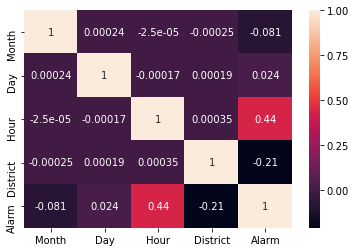

In [39]:
# Correlation heatmap

temp = cri6[['Month', 'Day', 'Hour', 'District', 'Alarm']]
sns.heatmap(temp.corr(), annot=True)
#plt.title("Checking!", fontsize=17)
plt.savefig("../results/plots/Correlation.png")

There is **No strong** correlation

## How good is our generated dataset for classification?

In [40]:
# Let's check how good our data is for classification
cri6['Alarm'].value_counts()

1    22640
0    12449
2     9272
Name: Alarm, dtype: int64

In [41]:
print("Low Crime Rate Percentage:", round(cri6['Alarm'].value_counts()[0]/cri6['Alarm'].value_counts().sum()*100,2))
print("Medium Crime Rate Percentage:", round(cri6['Alarm'].value_counts()[1]/cri6['Alarm'].value_counts().sum()*100,2))
print("High Crime Rate Percentage:", round(cri6['Alarm'].value_counts()[2]/cri6['Alarm'].value_counts().sum()*100.2))

Low Crime Rate Percentage: 28.06
Medium Crime Rate Percentage: 51.04
High Crime Rate Percentage: 21.0


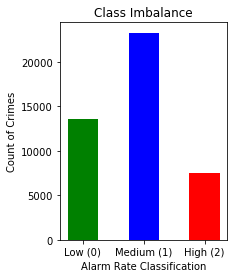

In [43]:
# Plotting the Imbalance

x=['Low (0)','Medium (1)','High (2)']
y=[13600, 23273, 7488]
fig, ax = plt.subplots(figsize=(3, 4))
plt.bar(x,y, color=['green', 'blue', 'red'], width=0.5)
# plt.title('THE IMBALANCE IN THE DATASET')
plt.xlabel('Alarm Rate Classification')
plt.ylabel('Count of Crimes')
plt.title("Class Imbalance")
plt.savefig("../results/plots/imbalance.png")

<strong>Oops!</strong><br>
Our classification dataset here is <strong>IMBALANCED!</strong>
<br>
Ways to deal with imbalanced datasets:<br>
<ul><li>Oversampling</li>
    <li>Undersampling</li>
</ul>

Useful Links 
https://www.datacamp.com/community/tutorials/naive-bayes-scikit-learn

**NOTE :** We don't use undersampling as that will bring about a huge loss of data. Such a data loss is unacceptable for a project that deals with sensitive information such as Crime.

## Modeling the problem as a Machine Learning Task

#### Samples 

##### Training Samples
* 75% of the 2015-2019 data

##### Testing Samples
1. 25% of the 2015-2019 data (with class imbalance)
2. 25% of the 2015-2019 data (without class imbalance; achieved by oversampling)
3. Crime records from 2012-2014 (this is called the ***God Test*** in this notebook)

In [46]:
""" Building our completely unseen final test dataset for the 'GOD TEST 1' """

# Load the Dataset
test_files = ['crimes_2013.csv', 'crimes_2012.csv', 'crimes_2014.csv']
test_files = [DATA_PATH+x for x in test_files]
test_df = us.create_df(test_files)

# Drop missing values
test_df = test_df.dropna()

# Using apply() of pandas to apply time_convert on every row of the Date column
test_df['Date'] = test_df['Date'].apply(time_convert)

# Feature Engineering our columns
test_df['Month'] = test_df['Date'].apply(month_col)
test_df['Day'] = test_df['Date'].apply(day_col)
test_df['Hour'] = test_df['Date'].apply(hour_col)

# Compressing
df7 = filter_top_10(test_df)
cri7 = df7.groupby(["Month", "Day", "District", "Hour"], as_index=False).agg({"Primary Type" : "count"})
cri7 = cri7.sort_values(by=["District"], ascending=False)
cri8 = cri7.rename(index=str, columns={"Primary Type" : "Crime_Count"})
cri8 = cri8[["Month", "Day", "District", "Hour", "Crime_Count"]]
cri8['Alarm'] = cri8['Crime_Count'].apply(crime_rate_assign)
cri8 = cri8[['Month','Day','Hour','District','Crime_Count','Alarm']]    
print(cri8.head())
print("Class Imbalance\n")
print(cri8['Alarm'].value_counts())

Finished Loading Chicago Crime Dataset File for the year 2013.
Finished Loading Chicago Crime Dataset File for the year 2012.
Finished Loading Chicago Crime Dataset File for the year 2014.
All data files loaded onto the Main Dataframe.


       Month  Day  Hour  District  Crime_Count  Alarm
28465      8    4    20        31            1      0
24243      7    3    10        31            1      0
25299      7    5    17        31            1      0
32680      9    5    23        31            1      0
28464      8    4     4        31            1      0
Class Imbalance

1    22933
0    16979
2     4353
Name: Alarm, dtype: int64


In [47]:
'''Creating the Oversampled balanced dataset'''

from sklearn.utils import resample # for upsampling

# Set individual classes
cri6_low = cri6[cri6['Alarm']==0]
cri6_medium = cri6[cri6['Alarm']==1]
cri6_high = cri6[cri6['Alarm']==2]

# Upsample the minority classes to size of class 1 (medium)
cri6_low_upsampled = resample(cri6_low, 
                                 replace=True,     # sample with replacement
                                 n_samples=22640,    # to match majority class
                                 random_state=101) 

cri6_high_upsampled = resample(cri6_high, 
                                 replace=True,     # sample with replacement
                                 n_samples=22640,    # to match majority class
                                 random_state=101)

# Combine majority class with upsampled minority class
cri6_upsampled = pd.concat([cri6_medium, cri6_low_upsampled, cri6_high_upsampled])
cri6_high_upsampled.shape

## The Modelling (`God Test Included`)

### Algorithm 1 : Decision Trees

In [169]:
# Using Decision Trees for classification (Imbalanced Dataset)

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils.multiclass import unique_labels

X = cri6[['Month', 'Day', 'Hour', 'District']] # independent
y = cri6['Alarm'] # dependent

# Let's split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101) # 75:25 split

# print(X_train)
# print('hi')
# print(X_test)
# Creating tree
d_tree = DecisionTreeClassifier(random_state=101)
# Fitting tree
d_tree = d_tree.fit(X_train, y_train)
# Predicting !
y_pred = d_tree.predict(X_test)

# Model Evaluation
# print(y_test)
# print(y_pred)
print("Accuracy:",(metrics.accuracy_score(y_test, y_pred)*100),"\n")

# Confusion Matrix for evaluating the model
cm = pd.crosstab(y_test, y_pred, rownames=['Actual Alarm'], colnames=['Predicted Alarm'])
print("\n----------Confusion Matrix------------------------------------")
print(cm)

# Classification Report
print("\n----------Classification Report------------------------------------")
print(classification_report(y_test,y_pred))

# Unweighted Average Recall
print("\nUAR ->",((cm[0][0])/(cm[0][0]+cm[1][0]+cm[2][0])+(cm[1][1])/(cm[0][1]+cm[1][1]+cm[2][1])+(cm[2][2])/(cm[2][2]+cm[0][2]+cm[1][2]))/3)

Accuracy: 71.73383824722748 


----------Confusion Matrix------------------------------------
Predicted Alarm     0     1     2
Actual Alarm                     
0                2358   692     6
1                 739  4086   876
2                   1   821  1512

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.76      0.77      0.77      3056
           1       0.73      0.72      0.72      5701
           2       0.63      0.65      0.64      2334

   micro avg       0.72      0.72      0.72     11091
   macro avg       0.71      0.71      0.71     11091
weighted avg       0.72      0.72      0.72     11091


UAR -> 0.7120427114047846


In [176]:
# Using Decision Trees for classification (Balanced Dataset)

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils.multiclass import unique_labels

X = cri6_upsampled[['Month', 'Day', 'Hour', 'District']] # independent
y = cri6_upsampled['Alarm'] # dependent

# Let's split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101) # 75:25 split

# print(X_train)
# print('hi')
# print(X_test)
# Creating tree
d_tree = DecisionTreeClassifier(random_state=101)
# Fitting tree
d_tree = d_tree.fit(X_train, y_train)
# Predicting !
y_pred = d_tree.predict(X_test)

# Model Evaluation
# print(y_test)
# print(y_pred)
print("Accuracy:",(metrics.accuracy_score(y_test, y_pred)*100),"\n")

# Confusion Matrix for evaluating the model
cm = pd.crosstab(y_test, y_pred, rownames=['Actual Alarm'], colnames=['Predicted Alarm'])
print("\n----------Confusion Matrix------------------------------------")
print(cm)

# Classification Report
print("\n----------Classification Report------------------------------------")
print(classification_report(y_test,y_pred))

# Unweighted Average Recall
print("\nUAR ->",((cm[0][0])/(cm[0][0]+cm[1][0]+cm[2][0])+(cm[1][1])/(cm[0][1]+cm[1][1]+cm[2][1])+(cm[2][2])/(cm[2][2]+cm[0][2]+cm[1][2]))/3)

Accuracy: 86.40164899882214 


----------Confusion Matrix------------------------------------
Predicted Alarm     0     1     2
Actual Alarm                     
0                5333   300     2
1                 716  3964   975
2                   0   316  5374

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      5635
           1       0.87      0.70      0.77      5655
           2       0.85      0.94      0.89      5690

   micro avg       0.86      0.86      0.86     16980
   macro avg       0.86      0.86      0.86     16980
weighted avg       0.86      0.86      0.86     16980


UAR -> 0.8639476503835563


In [177]:
'''God Test 1 : Decision Trees'''

X = cri8.iloc[:,0:4].values
y = cri8.iloc[:,5].values

# Testing directly
y_pred = d_tree.predict(X)

print("Accuracy:",(metrics.accuracy_score(y, y_pred)*100),"\n")

# Confusion Matrix for evaluating the model
cm = pd.crosstab(y, y_pred, rownames=['Actual Alarm'], colnames=['Predicted Alarm'])
print("\n----------Confusion Matrix------------------------------------")
print(cm)

# Classification Report
print("\n----------Classification Report------------------------------------")
print(classification_report(y,y_pred))

# Unweighted Average Recall
print("\nUAR ->",((cm[0][0])/(cm[0][0]+cm[1][0]+cm[2][0])+(cm[1][1])/(cm[0][1]+cm[1][1]+cm[2][1])+(cm[2][2])/(cm[2][2]+cm[0][2]+cm[1][2]))/3)

Accuracy: 65.3857449452163 


----------Confusion Matrix------------------------------------
Predicted Alarm      0      1     2
Actual Alarm                       
0                10913   5829   237
1                 1447  15006  6480
2                    7   1322  3024

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.64      0.74     16979
           1       0.68      0.65      0.67     22933
           2       0.31      0.69      0.43      4353

   micro avg       0.65      0.65      0.65     44265
   macro avg       0.62      0.66      0.61     44265
weighted avg       0.72      0.65      0.67     44265


UAR -> 0.6639231214951584


In [178]:
# Let's try with KFold cross validation
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=100, shuffle=False)

X = cri6.iloc[:,0:4].values
y = cri6.iloc[:,5].values

i=1
scores = []
for train_index, test_index in skf.split(X, y):
    #print('{} of KFold {}'.format(i,skf.n_splits))
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    d_tree = DecisionTreeClassifier(random_state=101)
    # Fitting tree
    d_tree = d_tree.fit(X_train, y_train)
    # Predicting !
    y_pred = d_tree.predict(X_test)
    
    # Model Evaluation
    # print(y_test)
    # print(y_pred)
    scores.append(metrics.accuracy_score(y_test, y_pred)*100)
    #print("Accuracy:",(metrics.accuracy_score(y_test, y_pred)*100),"\n")

# Accuracy
print("Accuracy:",np.mean(scores),"\n")   

# Confusion Matrix for evaluating the model
cm = pd.crosstab(y_test, y_pred, rownames=['Actual Alarm'], colnames=['Predicted Alarm'])
print("\n----------Confusion Matrix------------------------------------")
print(cm)

# Classification Report
print("\n----------Classification Report------------------------------------")
print(classification_report(y_test,y_pred))

# Unweighted Average Recall
print("\nUAR ->",((cm[0][0])/(cm[0][0]+cm[1][0]+cm[2][0])+(cm[1][1])/(cm[0][1]+cm[1][1]+cm[2][1])+(cm[2][2])/(cm[2][2]+cm[0][2]+cm[1][2]))/3)

Accuracy: 59.34723875040715 


----------Confusion Matrix------------------------------------
Predicted Alarm    0   1   2
Actual Alarm                
0                110  13   1
1                 53  81  92
2                  0   5  87

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.67      0.89      0.77       124
           1       0.82      0.36      0.50       226
           2       0.48      0.95      0.64        92

   micro avg       0.63      0.63      0.63       442
   macro avg       0.66      0.73      0.63       442
weighted avg       0.71      0.63      0.60       442


UAR -> 0.7303853425842032


### Algorithm 2 : Random Forest

In [179]:
# Using Random Forest for classification (Imbalanced Dataset)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.externals import joblib

X = cri6.iloc[:,0:4].values
y = cri6.iloc[:,5].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101)

#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

classifier = RandomForestClassifier(n_estimators = 1000, criterion = 'entropy', random_state = 101)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print("Accuracy:",(metrics.accuracy_score(y_test, y_pred)*100),"\n")

cm = pd.crosstab(y_test, y_pred, rownames=['Actual Alarm'], colnames=['Predicted Alarm'])
print("\n----------Confusion Matrix------------------------------------")
print(cm)

# Classification Report
print("\n----------Classification Report------------------------------------")
print(classification_report(y_test,y_pred))

# Unweighted Average Recall
print("\nUAR ->",((cm[0][0])/(cm[0][0]+cm[1][0]+cm[2][0])+(cm[1][1])/(cm[0][1]+cm[1][1]+cm[2][1])+(cm[2][2])/(cm[2][2]+cm[0][2]+cm[1][2]))/3)

Accuracy: 78.35181678838698 


----------Confusion Matrix------------------------------------
Predicted Alarm     0     1     2
Actual Alarm                     
0                2484   570     2
1                 525  4627   549
2                   0   755  1579

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      3056
           1       0.78      0.81      0.79      5701
           2       0.74      0.68      0.71      2334

   micro avg       0.78      0.78      0.78     11091
   macro avg       0.78      0.77      0.77     11091
weighted avg       0.78      0.78      0.78     11091


UAR -> 0.7669867390092366


In [180]:
# Using Random Forest for classification (Balanced Dataset)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.externals import joblib

X = cri6_upsampled.iloc[:,0:4].values
y = cri6_upsampled.iloc[:,5].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101)

#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

classifier = RandomForestClassifier(n_estimators = 1000, criterion = 'entropy', random_state = 101)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print("Accuracy:",(metrics.accuracy_score(y_test, y_pred)*100),"\n")

cm = pd.crosstab(y_test, y_pred, rownames=['Actual Alarm'], colnames=['Predicted Alarm'])
print("\n----------Confusion Matrix------------------------------------")
print(cm)

# Classification Report
print("\n----------Classification Report------------------------------------")
print(classification_report(y_test,y_pred))

# Unweighted Average Recall
print("\nUAR ->",((cm[0][0])/(cm[0][0]+cm[1][0]+cm[2][0])+(cm[1][1])/(cm[0][1]+cm[1][1]+cm[2][1])+(cm[2][2])/(cm[2][2]+cm[0][2]+cm[1][2]))/3)

Accuracy: 88.65135453474676 


----------Confusion Matrix------------------------------------
Predicted Alarm     0     1     2
Actual Alarm                     
0                5403   232     0
1                 590  4206   859
2                   0   246  5444

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      5635
           1       0.90      0.74      0.81      5655
           2       0.86      0.96      0.91      5690

   micro avg       0.89      0.89      0.89     16980
   macro avg       0.89      0.89      0.88     16980
weighted avg       0.89      0.89      0.88     16980


UAR -> 0.8864538612435692


In [181]:
'''God Test 1 : Random Forest'''

X = cri8.iloc[:,0:4].values
y = cri8.iloc[:,5].values

# Testing directly
y_pred = classifier.predict(X)

print("Accuracy:",(metrics.accuracy_score(y, y_pred)*100),"\n")

# Confusion Matrix for evaluating the model
cm = pd.crosstab(y, y_pred, rownames=['Actual Alarm'], colnames=['Predicted Alarm'])
print("\n----------Confusion Matrix------------------------------------")
print(cm)

# Classification Report
print("\n----------Classification Report------------------------------------")
print(classification_report(y,y_pred))

# Unweighted Average Recall
print("\nUAR ->",((cm[0][0])/(cm[0][0]+cm[1][0]+cm[2][0])+(cm[1][1])/(cm[0][1]+cm[1][1]+cm[2][1])+(cm[2][2])/(cm[2][2]+cm[0][2]+cm[1][2]))/3)

Accuracy: 66.24647012312211 


----------Confusion Matrix------------------------------------
Predicted Alarm      0      1     2
Actual Alarm                       
0                11073   5683   223
1                 1336  15168  6429
2                    5   1265  3083

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.65      0.75     16979
           1       0.69      0.66      0.67     22933
           2       0.32      0.71      0.44      4353

   micro avg       0.66      0.66      0.66     44265
   macro avg       0.63      0.67      0.62     44265
weighted avg       0.73      0.66      0.68     44265


UAR -> 0.6739368989752799


In [52]:
# Using Random Forest for classification (Imbalanced Dataset) (using k-fold)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.externals import joblib

X = cri6.iloc[:,0:4].values
y = cri6.iloc[:,5].values

scores = []
for train_index, test_index in skf.split(X, y):
    #print('{} of KFold {}'.format(i,skf.n_splits))
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 101)
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)
    
    # Model Evaluation
    # print(y_test)
    # print(y_pred)
    scores.append(metrics.accuracy_score(y_test, y_pred)*100)
    #print("Accuracy:",(metrics.accuracy_score(y_test, y_pred)*100),"\n")

#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

# Accuracy
print("Accuracy:",np.mean(scores),"\n") 

cm = pd.crosstab(y_test, y_pred, rownames=['Actual Alarm'], colnames=['Predicted Alarm'])
print("\n----------Confusion Matrix------------------------------------")
print(cm)

# Classification Report
print("\n----------Classification Report------------------------------------")
print(classification_report(y_test,y_pred))

# Unweighted Average Recall
print("\nUAR ->",((cm[0][0])/(cm[0][0]+cm[1][0]+cm[2][0])+(cm[1][1])/(cm[0][1]+cm[1][1]+cm[2][1])+(cm[2][2])/(cm[2][2]+cm[0][2]+cm[1][2]))/3)

Accuracy: 66.53434303377871 


----------Confusion Matrix------------------------------------
Predicted Alarm    0   1    2
Actual Alarm                 
0                125  10    1
1                 41  88  103
2                  0   2   72

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.75      0.92      0.83       136
           1       0.88      0.38      0.53       232
           2       0.41      0.97      0.58        74

   micro avg       0.64      0.64      0.64       442
   macro avg       0.68      0.76      0.64       442
weighted avg       0.76      0.64      0.63       442


UAR -> 0.7571336549531275


### Algorithm 3 : Naive Bayes

In [182]:
# Using the Naive Bayes' Classifier[GaussianNB] (Imbalanced Dataset)
'''NOTE : The imbalanced dataset  when used caused NB classifier to not predict class 2 (high crime rate)'''

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import confusion_matrix, classification_report

X = cri6.iloc[:,0:4].values
y = cri6.iloc[:,5].values

# Let's split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101) # 75:25 split

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)


# Model Evaluation
# print(y_test)
# print(y_pred)
print("Accuracy:",(metrics.accuracy_score(y_test, y_pred)*100),"\n")

# Confusion Matrix for evaluating the model
cm = pd.crosstab(y_test, y_pred, rownames=['Actual Alarm'], colnames=['Predicted Alarm'])
print("\n----------Confusion Matrix------------------------------------")
print(cm)

# Classification Report
print("\n----------Classification Report------------------------------------")
print(classification_report(y_test,y_pred))

# Unweighted Average Recall
print("\nUAR ->",((cm[0][0])/(cm[0][0]+cm[1][0]+cm[2][0])+(cm[1][1])/(cm[0][1]+cm[1][1]+cm[2][1])+(cm[2][2])/(cm[2][2]+cm[0][2]+cm[1][2]))/3)

Accuracy: 58.50689748444685 


----------Confusion Matrix------------------------------------
Predicted Alarm     0     1    2
Actual Alarm                    
0                1903  1147    6
1                1114  4425  162
2                 142  2031  161

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.60      0.62      0.61      3056
           1       0.58      0.78      0.67      5701
           2       0.49      0.07      0.12      2334

   micro avg       0.59      0.59      0.59     11091
   macro avg       0.56      0.49      0.47     11091
weighted avg       0.57      0.59      0.54     11091


UAR -> 0.48928977768001497


In [183]:
# Using the Naive Bayes' Classifier[GaussianNB] (Balanced Dataset)
'''NOTE : The imbalanced dataset  when used caused NB classifier to not predict class 2 (high crime rate)'''

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import confusion_matrix, classification_report

X = cri6_upsampled.iloc[:,0:4].values
y = cri6_upsampled.iloc[:,5].values

# Let's split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101) # 75:25 split

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)


# Model Evaluation
# print(y_test)
# print(y_pred)
print("Accuracy:",(metrics.accuracy_score(y_test, y_pred)*100),"\n")

# Confusion Matrix for evaluating the model
cm = pd.crosstab(y_test, y_pred, rownames=['Actual Alarm'], colnames=['Predicted Alarm'])
print("\n----------Confusion Matrix------------------------------------")
print(cm)

# Classification Report
print("\n----------Classification Report------------------------------------")
print(classification_report(y_test,y_pred))

# Unweighted Average Recall
print("\nUAR ->",((cm[0][0])/(cm[0][0]+cm[1][0]+cm[2][0])+(cm[1][1])/(cm[0][1]+cm[1][1]+cm[2][1])+(cm[2][2])/(cm[2][2]+cm[0][2]+cm[1][2]))/3)

Accuracy: 59.840989399293285 


----------Confusion Matrix------------------------------------
Predicted Alarm     0     1     2
Actual Alarm                     
0                4844   550   241
1                1976  1132  2547
2                 647   858  4185

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.65      0.86      0.74      5635
           1       0.45      0.20      0.28      5655
           2       0.60      0.74      0.66      5690

   micro avg       0.60      0.60      0.60     16980
   macro avg       0.56      0.60      0.56     16980
weighted avg       0.56      0.60      0.56     16980


UAR -> 0.5984350141955873


In [184]:
'''God Test 1 : Naive Bayes'''

X = cri8.iloc[:,0:4].values
y = cri8.iloc[:,5].values

# Testing directly
y_pred = gnb.predict(X)

print("Accuracy:",(metrics.accuracy_score(y, y_pred)*100),"\n")

# Confusion Matrix for evaluating the model
cm = pd.crosstab(y, y_pred, rownames=['Actual Alarm'], colnames=['Predicted Alarm'])
print("\n----------Confusion Matrix------------------------------------")
print(cm)

# Classification Report
print("\n----------Classification Report------------------------------------")
print(classification_report(y,y_pred))

# Unweighted Average Recall
print("\nUAR ->",((cm[0][0])/(cm[0][0]+cm[1][0]+cm[2][0])+(cm[1][1])/(cm[0][1]+cm[1][1]+cm[2][1])+(cm[2][2])/(cm[2][2]+cm[0][2]+cm[1][2]))/3)

Accuracy: 47.014571331751945 


----------Confusion Matrix------------------------------------
Predicted Alarm      0     1      2
Actual Alarm                       
0                12979  2118   1882
1                 6131  4589  12213
2                  504   606   3243

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.66      0.76      0.71     16979
           1       0.63      0.20      0.30     22933
           2       0.19      0.75      0.30      4353

   micro avg       0.47      0.47      0.47     44265
   macro avg       0.49      0.57      0.44     44265
weighted avg       0.60      0.47      0.46     44265


UAR -> 0.569840988001759


In [185]:
# Using the Naive Bayes' Classifier[GaussianNB] (Imbalanced Dataset) (k fold)
'''NOTE : The imbalanced dataset  when used caused NB classifier to not predict class 2 (high crime rate)'''

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import confusion_matrix, classification_report

X = cri6.iloc[:,0:4].values
y = cri6.iloc[:,5].values

# Let's split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101) # 75:25 split

scores = []
for train_index, test_index in skf.split(X, y):
    #print('{} of KFold {}'.format(i,skf.n_splits))
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    #Create a Gaussian Classifier
    gnb = GaussianNB()

    #Train the model using the training sets
    gnb.fit(X_train, y_train)

    #Predict the response for test dataset
    y_pred = gnb.predict(X_test)


    # Model Evaluation
    # print(y_test)
    # print(y_pred)
    scores.append(metrics.accuracy_score(y_test, y_pred)*100)
    #print("Accuracy:",(metrics.accuracy_score(y_test, y_pred)*100),"\n")

#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

# Accuracy
print("Accuracy:",np.mean(scores),"\n") 

# Confusion Matrix for evaluating the model
cm = pd.crosstab(y_test, y_pred, rownames=['Actual Alarm'], colnames=['Predicted Alarm'])
print("\n----------Confusion Matrix------------------------------------")
print(cm)

# Classification Report
print("\n----------Classification Report------------------------------------")
print(classification_report(y_test,y_pred))

# Unweighted Average Recall
print("\nUAR ->",((cm[0][0])/(cm[0][0]+cm[1][0]+cm[2][0])+(cm[1][1])/(cm[0][1]+cm[1][1]+cm[2][1])+(cm[2][2])/(cm[2][2]+cm[0][2]+cm[1][2]))/3)

Accuracy: 58.05841127795969 


----------Confusion Matrix------------------------------------
Predicted Alarm   0    1  2
Actual Alarm               
0                26   98  0
1                32  189  5
2                 0   92  0

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.45      0.21      0.29       124
           1       0.50      0.84      0.62       226
           2       0.00      0.00      0.00        92

   micro avg       0.49      0.49      0.49       442
   macro avg       0.32      0.35      0.30       442
weighted avg       0.38      0.49      0.40       442


UAR -> 0.3486535350651822


### Algorithm 4 : KNN Classifier

Text(0.5, 1.0, 'Choosing k value for KNN Algorithm')

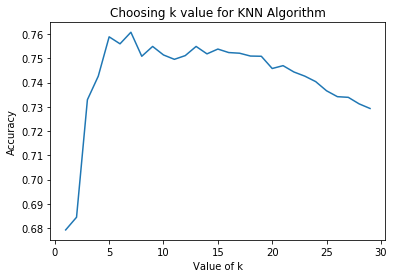

In [186]:
# KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

X = cri6.iloc[:,0:4].values
y = cri6.iloc[:,5].values

# Let's split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1) # 75:25 split

'''We need to decide the optimal value for k. So, let us do that.'''
k_vals = range(1,30)
acc = []
for k in k_vals:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, y_pred))
# plot the graph
plt.plot(k_vals,acc)
plt.xlabel('Value of k')
plt.ylabel('Accuracy')
plt.title('Choosing k value for KNN Algorithm')

In [187]:
'''KNN Classifier on the imbalanced dataset itself'''
# KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

X = cri6.iloc[:,0:4].values
y = cri6.iloc[:,5].values

# Let's split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101) # 75:25 split

# Choosing k as 5 (Seems to be the best value)
knn1 = KNeighborsClassifier(n_neighbors = 5)
knn1.fit(X_train, y_train)
y_pred = knn1.predict(X_test)

# Model Evaluation
# print(y_test)
# print(y_pred)
print('KNN Classifier on the imbalanced dataset itself')
print("Accuracy:",(metrics.accuracy_score(y_test, y_pred)*100),"\n")

# Confusion Matrix for evaluating the model
cm = pd.crosstab(y_test, y_pred, rownames=['Actual Alarm'], colnames=['Predicted Alarm'])
print("\n----------Confusion Matrix------------------------------------")
print(cm)

# Classification Report
print("\n----------Classification Report------------------------------------")
print(classification_report(y_test,y_pred))

# Unweighted Average Recall
print("\nUAR ->",((cm[0][0])/(cm[0][0]+cm[1][0]+cm[2][0])+(cm[1][1])/(cm[0][1]+cm[1][1]+cm[2][1])+(cm[2][2])/(cm[2][2]+cm[0][2]+cm[1][2]))/3)

KNN Classifier on the imbalanced dataset itself
Accuracy: 75.89036155441349 


----------Confusion Matrix------------------------------------
Predicted Alarm     0     1     2
Actual Alarm                     
0                2451   604     1
1                 630  4525   546
2                  13   880  1441

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.79      0.80      0.80      3056
           1       0.75      0.79      0.77      5701
           2       0.72      0.62      0.67      2334

   micro avg       0.76      0.76      0.76     11091
   macro avg       0.76      0.74      0.75     11091
weighted avg       0.76      0.76      0.76     11091


UAR -> 0.7377147419109287


In [188]:
'''KNN Classifier on the balanced dataset'''
X = cri6_upsampled.iloc[:,0:4].values
y = cri6_upsampled.iloc[:,5].values

# Let's split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101) # 75:25 split

# Choosing k as 1 (Seems to be the best value)
knn2 = KNeighborsClassifier(n_neighbors = 5)
knn2.fit(X_train, y_train)
y_pred = knn2.predict(X_test)

# Model Evaluation
# print(y_test)
# print(y_pred)
print('\n\nKNN Classifier on the upsampled dataset')
print("Accuracy:",(metrics.accuracy_score(y_test, y_pred)*100),"\n")

# Confusion Matrix for evaluating the model
cm = pd.crosstab(y_test, y_pred, rownames=['Actual Alarm'], colnames=['Predicted Alarm'])
print("\n----------Confusion Matrix------------------------------------")
print(cm)

# Classification Report
print("\n----------Classification Report------------------------------------")
print(classification_report(y_test,y_pred))

# Unweighted Average Recall
print("\nUAR ->",((cm[0][0])/(cm[0][0]+cm[1][0]+cm[2][0])+(cm[1][1])/(cm[0][1]+cm[1][1]+cm[2][1])+(cm[2][2])/(cm[2][2]+cm[0][2]+cm[1][2]))/3)



KNN Classifier on the upsampled dataset
Accuracy: 80.10011778563015 


----------Confusion Matrix------------------------------------
Predicted Alarm     0     1     2
Actual Alarm                     
0                5180   434    21
1                 968  3372  1315
2                  44   597  5049

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      5635
           1       0.77      0.60      0.67      5655
           2       0.79      0.89      0.84      5690

   micro avg       0.80      0.80      0.80     16980
   macro avg       0.80      0.80      0.79     16980
weighted avg       0.80      0.80      0.79     16980


UAR -> 0.8009624506582531


In [189]:
'''God Test 1 : KNN'''

X = cri8.iloc[:,0:4].values
y = cri8.iloc[:,5].values

# Testing directly
y_pred = knn1.predict(X)

print("Accuracy:",(metrics.accuracy_score(y, y_pred)*100),"\n")

# Confusion Matrix for evaluating the model
cm = pd.crosstab(y, y_pred, rownames=['Actual Alarm'], colnames=['Predicted Alarm'])
print("\n----------Confusion Matrix------------------------------------")
print(cm)

# Classification Report
print("\n----------Classification Report------------------------------------")
print(classification_report(y,y_pred))

# Unweighted Average Recall
print("\nUAR ->",((cm[0][0])/(cm[0][0]+cm[1][0]+cm[2][0])+(cm[1][1])/(cm[0][1]+cm[1][1]+cm[2][1])+(cm[2][2])/(cm[2][2]+cm[0][2]+cm[1][2]))/3)

Accuracy: 69.27821077600814 


----------Confusion Matrix------------------------------------
Predicted Alarm      0      1     2
Actual Alarm                       
0                11114   5724   141
1                 1150  16714  5069
2                   10   1505  2838

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.65      0.76     16979
           1       0.70      0.73      0.71     22933
           2       0.35      0.65      0.46      4353

   micro avg       0.69      0.69      0.69     44265
   macro avg       0.65      0.68      0.64     44265
weighted avg       0.74      0.69      0.71     44265


UAR -> 0.6784520639672884


In [71]:
'''KNN Classifier on the imbalanced dataset itself - Using k-fold validation'''
# KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

X = cri6.iloc[:,0:4].values
y = cri6.iloc[:,5].values

scores = []
for train_index, test_index in skf.split(X, y):
    #print('{} of KFold {}'.format(i,skf.n_splits))
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Choosing k as 5 (Seems to be the best value)
    knn = KNeighborsClassifier(n_neighbors = 5)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    # Model Evaluation
    # print(y_test)
    # print(y_pred)
    scores.append(metrics.accuracy_score(y_test, y_pred)*100)
    #print("Accuracy:",(metrics.accuracy_score(y_test, y_pred)*100),"\n")


# Model Evaluation
# print(y_test)
# print(y_pred)
print('KNN Classifier on the imbalanced dataset itself')
print("Accuracy:",(np.mean(scores)),"\n")

# Confusion Matrix for evaluating the model
cm = pd.crosstab(y_test, y_pred, rownames=['Actual Alarm'], colnames=['Predicted Alarm'])
print("\n----------Confusion Matrix------------------------------------")
print(cm)

# Classification Report
print("\n----------Classification Report------------------------------------")
print(classification_report(y_test,y_pred))

# Unweighted Average Recall
print("\nUAR ->",((cm[0][0])/(cm[0][0]+cm[1][0]+cm[2][0])+(cm[1][1])/(cm[0][1]+cm[1][1]+cm[2][1])+(cm[2][2])/(cm[2][2]+cm[0][2]+cm[1][2]))/3)

##################################################################################################

'''KNN Classifier on the upsampled dataset'''
X = cri6_upsampled.iloc[:,0:4].values
y = cri6_upsampled.iloc[:,5].values

scores = []
for train_index, test_index in skf.split(X, y):
    #print('{} of KFold {}'.format(i,skf.n_splits))
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Choosing k as 5 (Seems to be the best value)
    knn = KNeighborsClassifier(n_neighbors = 5)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    # Model Evaluation
    # print(y_test)
    # print(y_pred)
    scores.append(metrics.accuracy_score(y_test, y_pred)*100)
    #print("Accuracy:",(metrics.accuracy_score(y_test, y_pred)*100),"\n")

# Model Evaluation
# print(y_test)
# print(y_pred)
print('\n\nKNN Classifier on the upsampled dataset')
print("Accuracy:",(np.mean(scores)),"\n")

# Confusion Matrix for evaluating the model
cm = pd.crosstab(y_test, y_pred, rownames=['Actual Alarm'], colnames=['Predicted Alarm'])
print("\n----------Confusion Matrix------------------------------------")
print(cm)

# Classification Report
print("\n----------Classification Report------------------------------------")
print(classification_report(y_test,y_pred))

# Unweighted Average Recall
print("\nUAR ->",((cm[0][0])/(cm[0][0]+cm[1][0]+cm[2][0])+(cm[1][1])/(cm[0][1]+cm[1][1]+cm[2][1])+(cm[2][2])/(cm[2][2]+cm[0][2]+cm[1][2]))/3)

KNN Classifier on the imbalanced dataset itself
Accuracy: 66.49466296986547 


----------Confusion Matrix------------------------------------
Predicted Alarm    0    1   2
Actual Alarm                 
0                118   18   0
1                 31  151  50
2                  0   27  47

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.79      0.87      0.83       136
           1       0.77      0.65      0.71       232
           2       0.48      0.64      0.55        74

   micro avg       0.71      0.71      0.71       442
   macro avg       0.68      0.72      0.69       442
weighted avg       0.73      0.71      0.72       442


UAR -> 0.7178814209747273


KNN Classifier on the upsampled dataset
Accuracy: 77.45164274086133 


----------Confusion Matrix------------------------------------
Predicted Alarm    0   1    2
Actual Alarm                 
0                211  20    1
1    

SVM : https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC

### Algorithm 5 : SVM

In [190]:
# Support Vector Machines (Imbalanced dataset)
from sklearn import svm
from sklearn.model_selection import train_test_split

'''Balanced dataset with oversampling'''
X = cri6.iloc[:,0:4].values
y = cri6.iloc[:,5].values

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=101) # 75:25 split

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Evaluation
# print(y_test)
# print(y_pred)
print("SVM with oversampled balanced dataset")
print("Accuracy:",(metrics.accuracy_score(y_test, y_pred)*100),"\n")

# Confusion Matrix for evaluating the model
cm = pd.crosstab(y_test, y_pred, rownames=['Actual Alarm'], colnames=['Predicted Alarm'])
print("\n----------Confusion Matrix------------------------------------")
print(cm)

# Classification Report
print("\n----------Classification Report------------------------------------")
print(classification_report(y_test,y_pred))

# Unweighted Average Recall
print("\nUAR ->",((cm[0][0])/(cm[0][0]+cm[1][0]+cm[2][0])+(cm[1][1])/(cm[0][1]+cm[1][1]+cm[2][1])+(cm[2][2])/(cm[2][2]+cm[0][2]+cm[1][2]))/3)

SVM with oversampled balanced dataset
Accuracy: 58.3175547741412 


----------Confusion Matrix------------------------------------
Predicted Alarm     0     1
Actual Alarm               
0                1949  1107
1                1182  4519
2                 145  2189

----------Classification Report------------------------------------


C:\Users\Ramshankar Yadhunath\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ramshankar Yadhunath\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ramshankar Yadhunath\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.59      0.64      0.62      3056
           1       0.58      0.79      0.67      5701
           2       0.00      0.00      0.00      2334

   micro avg       0.58      0.58      0.58     11091
   macro avg       0.39      0.48      0.43     11091
weighted avg       0.46      0.58      0.51     11091



KeyError: 2

In [191]:
# Support Vector Machines (Balanced dataset)
from sklearn import svm
from sklearn.model_selection import train_test_split

X = cri6_upsampled.iloc[:,0:4].values
y = cri6_upsampled.iloc[:,5].values

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=101) # 75:25 split

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Evaluation
# print(y_test)
# print(y_pred)
print("SVM with oversampled balanced dataset")
print("Accuracy:",(metrics.accuracy_score(y_test, y_pred)*100),"\n")

# Confusion Matrix for evaluating the model
cm = pd.crosstab(y_test, y_pred, rownames=['Actual Alarm'], colnames=['Predicted Alarm'])
print("\n----------Confusion Matrix------------------------------------")
print(cm)

# Classification Report
print("\n----------Classification Report------------------------------------")
print(classification_report(y_test,y_pred))

# Unweighted Average Recall
print("\nUAR ->",((cm[0][0])/(cm[0][0]+cm[1][0]+cm[2][0])+(cm[1][1])/(cm[0][1]+cm[1][1]+cm[2][1])+(cm[2][2])/(cm[2][2]+cm[0][2]+cm[1][2]))/3)

SVM with oversampled balanced dataset
Accuracy: 59.252061248527674 


----------Confusion Matrix------------------------------------
Predicted Alarm     0     1     2
Actual Alarm                     
0                4779   560   296
1                1889  1455  2311
2                 597  1266  3827

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.66      0.85      0.74      5635
           1       0.44      0.26      0.33      5655
           2       0.59      0.67      0.63      5690

   micro avg       0.59      0.59      0.59     16980
   macro avg       0.57      0.59      0.57     16980
weighted avg       0.57      0.59      0.57     16980


UAR -> 0.5926567299625812


In [192]:
'''God Test 1 : SVM'''

X = cri8.iloc[:,0:4].values
y = cri8.iloc[:,5].values

# Testing directly
y_pred = clf.predict(X)

print("Accuracy:",(metrics.accuracy_score(y, y_pred)*100),"\n")

# Confusion Matrix for evaluating the model
cm = pd.crosstab(y, y_pred, rownames=['Actual Alarm'], colnames=['Predicted Alarm'])
print("\n----------Confusion Matrix------------------------------------")
print(cm)

# Classification Report
print("\n----------Classification Report------------------------------------")
print(classification_report(y,y_pred))

# Unweighted Average Recall
print("\nUAR ->",((cm[0][0])/(cm[0][0]+cm[1][0]+cm[2][0])+(cm[1][1])/(cm[0][1]+cm[1][1]+cm[2][1])+(cm[2][2])/(cm[2][2]+cm[0][2]+cm[1][2]))/3)

Accuracy: 49.22851010956738 


----------Confusion Matrix------------------------------------
Predicted Alarm      0     1      2
Actual Alarm                       
0                12779  2267   1933
1                 5807  6043  11083
2                  468   916   2969

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.67      0.75      0.71     16979
           1       0.65      0.26      0.38     22933
           2       0.19      0.68      0.29      4353

   micro avg       0.49      0.49      0.49     44265
   macro avg       0.50      0.57      0.46     44265
weighted avg       0.61      0.49      0.50     44265


UAR -> 0.5660668987574827


### Algorithm 6 : Logistic Regression

In [193]:
# Logistic Regression for imbalanced dataset
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

X = cri6.iloc[:,0:4].values
y = cri6.iloc[:,5].values

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=101) # 75:25 split

logreg = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial')

# Create an instance of Logistic Regression Classifier and fit the data.
logreg.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = logreg.predict(X_test)

# Model Evaluation
# print(y_test)
# print(y_pred)
print("Logistic Regression with imbalanced dataset")
print("Accuracy:",(metrics.accuracy_score(y_test, y_pred)*100),"\n")

# Confusion Matrix for evaluating the model
cm = pd.crosstab(y_test, y_pred, rownames=['Actual Alarm'], colnames=['Predicted Alarm'])
print("\n----------Confusion Matrix------------------------------------")
print(cm)

# Classification Report
print("\n----------Classification Report------------------------------------")
print(classification_report(y_test,y_pred))

# Unweighted Average Recall
print("\nUAR ->",((cm[0][0])/(cm[0][0]+cm[1][0]+cm[2][0])+(cm[1][1])/(cm[0][1]+cm[1][1]+cm[2][1])+(cm[2][2])/(cm[2][2]+cm[0][2]+cm[1][2]))/3)



Logistic Regression with imbalanced dataset
Accuracy: 56.126589126318635 


----------Confusion Matrix------------------------------------
Predicted Alarm     0     1    2
Actual Alarm                    
0                1663  1374   19
1                1023  4414  264
2                 138  2048  148

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.59      0.54      0.57      3056
           1       0.56      0.77      0.65      5701
           2       0.34      0.06      0.11      2334

   micro avg       0.56      0.56      0.56     11091
   macro avg       0.50      0.46      0.44     11091
weighted avg       0.52      0.56      0.51     11091


UAR -> 0.4606119927939933


In [194]:
# Logistic Regression for balanced dataset
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

X = cri6_upsampled.iloc[:,0:4].values
y = cri6_upsampled.iloc[:,5].values

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=101) # 75:25 split

logreg = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial')

# Create an instance of Logistic Regression Classifier and fit the data.
logreg.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = logreg.predict(X_test)

# Model Evaluation
# print(y_test)
# print(y_pred)
print("Logistic Regression with balanced dataset")
print("Accuracy:",(metrics.accuracy_score(y_test, y_pred)*100),"\n")

# Confusion Matrix for evaluating the model
cm = pd.crosstab(y_test, y_pred, rownames=['Actual Alarm'], colnames=['Predicted Alarm'])
print("\n----------Confusion Matrix------------------------------------")
print(cm)

# Classification Report
print("\n----------Classification Report------------------------------------")
print(classification_report(y_test,y_pred))

# Unweighted Average Recall
print("\nUAR ->",((cm[0][0])/(cm[0][0]+cm[1][0]+cm[2][0])+(cm[1][1])/(cm[0][1]+cm[1][1]+cm[2][1])+(cm[2][2])/(cm[2][2]+cm[0][2]+cm[1][2]))/3)



Logistic Regression with imbalanced dataset
Accuracy: 58.8751472320377 


----------Confusion Matrix------------------------------------
Predicted Alarm     0     1     2
Actual Alarm                     
0                4581   648   406
1                1700  1719  2236
2                 542  1451  3697

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.67      0.81      0.74      5635
           1       0.45      0.30      0.36      5655
           2       0.58      0.65      0.61      5690

   micro avg       0.59      0.59      0.59     16980
   macro avg       0.57      0.59      0.57     16980
weighted avg       0.57      0.59      0.57     16980


UAR -> 0.5888899688568144


In [195]:
'''God Test 1 : Logistic Regression'''

X = cri8.iloc[:,0:4].values
y = cri8.iloc[:,5].values

# Testing directly
y_pred = logreg.predict(X)

print("Accuracy:",(metrics.accuracy_score(y, y_pred)*100),"\n")

# Confusion Matrix for evaluating the model
cm = pd.crosstab(y, y_pred, rownames=['Actual Alarm'], colnames=['Predicted Alarm'])
print("\n----------Confusion Matrix------------------------------------")
print(cm)

# Classification Report
print("\n----------Classification Report------------------------------------")
print(classification_report(y,y_pred))

# Unweighted Average Recall
print("\nUAR ->",((cm[0][0])/(cm[0][0]+cm[1][0]+cm[2][0])+(cm[1][1])/(cm[0][1]+cm[1][1]+cm[2][1])+(cm[2][2])/(cm[2][2]+cm[0][2]+cm[1][2]))/3)

Accuracy: 49.632892804698976 


----------Confusion Matrix------------------------------------
Predicted Alarm      0     1      2
Actual Alarm                       
0                12095  2679   2205
1                 5241  7025  10667
2                  422  1081   2850

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.68      0.71      0.70     16979
           1       0.65      0.31      0.42     22933
           2       0.18      0.65      0.28      4353

   micro avg       0.50      0.50      0.50     44265
   macro avg       0.50      0.56      0.47     44265
weighted avg       0.62      0.50      0.51     44265


UAR -> 0.5577995198927558


In [196]:
# Logistic Regression for imbalanced dataset (k fold)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

X = cri6.iloc[:,0:4].values
y = cri6.iloc[:,5].values

scores = []
for train_index, test_index in skf.split(X, y):
    #print('{} of KFold {}'.format(i,skf.n_splits))
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Choosing k as 5 (Seems to be the best value)
    logreg = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial')

    # Create an instance of Logistic Regression Classifier and fit the data.
    logreg.fit(X_train, y_train)

    #Predict the response for test dataset
    y_pred = logreg.predict(X_test)
    # Model Evaluation
    # print(y_test)
    # print(y_pred)
    scores.append(metrics.accuracy_score(y_test, y_pred)*100)
    #print("Accuracy:",(metrics.accuracy_score(y_test, y_pred)*100),"\n")

# Model Evaluation
# print(y_test)
# print(y_pred)
print("Logistic Regression with imbalanced dataset")
print("Accuracy:",(np.mean(scores)),"\n")

# Confusion Matrix for evaluating the model
cm = pd.crosstab(y_test, y_pred, rownames=['Actual Alarm'], colnames=['Predicted Alarm'])
print("\n----------Confusion Matrix------------------------------------")
print(cm)

# Classification Report
print("\n----------Classification Report------------------------------------")
print(classification_report(y_test,y_pred))

# Unweighted Average Recall
print("\nUAR ->",((cm[0][0])/(cm[0][0]+cm[1][0]+cm[2][0])+(cm[1][1])/(cm[0][1]+cm[1][1]+cm[2][1])+(cm[2][2])/(cm[2][2]+cm[0][2]+cm[1][2]))/3)



Logistic Regression with imbalanced dataset
Accuracy: 55.89737291023121 


----------Confusion Matrix------------------------------------
Predicted Alarm   0    1   2
Actual Alarm                
0                14  107   3
1                33  153  40
2                 0   86   6

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.30      0.11      0.16       124
           1       0.44      0.68      0.53       226
           2       0.12      0.07      0.09        92

   micro avg       0.39      0.39      0.39       442
   macro avg       0.29      0.29      0.26       442
weighted avg       0.34      0.39      0.34       442


UAR -> 0.28503725585109246


### Algorithm 7 : Linear Discriminant Analysis

In [ ]:
# Linear Discriminant Analysis for imbalanced dataset
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn import metrics

X = cri6.iloc[:,0:4].values
y = cri6.iloc[:,5].values

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=1) # 75:25 split

clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Evaluation
# print(y_test)
# print(y_pred)
print("LDA with imbalanced dataset")
print("Accuracy:",(metrics.accuracy_score(y_test, y_pred)*100),"\n")

# Confusion Matrix for evaluating the model
cm = pd.crosstab(y_test, y_pred, rownames=['Actual Alarm'], colnames=['Predicted Alarm'])
print("\n----------Confusion Matrix------------------------------------")
print(cm)

# Classification Report
print("\n----------Classification Report------------------------------------")
print(classification_report(y_test,y_pred))

# Unweighted Average Recall
print("\nUAR ->",((cm[0][0])/(cm[0][0]+cm[1][0]+cm[2][0])+(cm[1][1])/(cm[0][1]+cm[1][1]+cm[2][1])+(cm[2][2])/(cm[2][2]+cm[0][2]+cm[1][2]))/3)

In [ ]:
'''God Test 8 : LDA'''

X = cri8.iloc[:,0:4].values
y = cri8.iloc[:,5].values

# Testing directly
y_pred = logreg.predict(X)

print("Accuracy:",(metrics.accuracy_score(y, y_pred)*100),"\n")

# Confusion Matrix for evaluating the model
cm = pd.crosstab(y, y_pred, rownames=['Actual Alarm'], colnames=['Predicted Alarm'])
print("\n----------Confusion Matrix------------------------------------")
print(cm)

# Classification Report
print("\n----------Classification Report------------------------------------")
print(classification_report(y,y_pred))

# Unweighted Average Recall
print("\nUAR ->",((cm[0][0])/(cm[0][0]+cm[1][0]+cm[2][0])+(cm[1][1])/(cm[0][1]+cm[1][1]+cm[2][1])+(cm[2][2])/(cm[2][2]+cm[0][2]+cm[1][2]))/3)

In [43]:
# Linear Discriminant Analysis for balanced dataset
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn import metrics

X = cri6_upsampled.iloc[:,0:4].values
y = cri6_upsampled.iloc[:,5].values

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=1) # 75:25 split

clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Evaluation
# print(y_test)
# print(y_pred)
print("LDA with balanced oversampled dataset")
print("Accuracy:",(metrics.accuracy_score(y_test, y_pred)*100),"\n")

# Confusion Matrix for evaluating the model
cm = pd.crosstab(y_test, y_pred, rownames=['Actual Alarm'], colnames=['Predicted Alarm'])
print("\n----------Confusion Matrix------------------------------------")
print(cm)

# Classification Report
print("\n----------Classification Report------------------------------------")
print(classification_report(y_test,y_pred))

# Unweighted Average Recall
print("\nUAR ->",((cm[0][0])/(cm[0][0]+cm[1][0]+cm[2][0])+(cm[1][1])/(cm[0][1]+cm[1][1]+cm[2][1])+(cm[2][2])/(cm[2][2]+cm[0][2]+cm[1][2]))/3)

LDA with balanced oversampled dataset
Accuracy: 58.52191349183615 


----------Confusion Matrix------------------------------------
Predicted Alarm     0     1     2
Actual Alarm                     
0                4730   627   438
1                1826  1733  2372
2                 538  1439  3752

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.67      0.82      0.73      5795
           1       0.46      0.29      0.36      5931
           2       0.57      0.65      0.61      5729

   micro avg       0.59      0.59      0.59     17455
   macro avg       0.56      0.59      0.57     17455
weighted avg       0.56      0.59      0.57     17455


UAR -> 0.587776012273459


### Algorithm 8 : Qudratic Discriminant Analysis

In [44]:
# Quadratic Discriminant Analysis for imbalanced dataset
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn import metrics

X = cri6.iloc[:,0:4].values
y = cri6.iloc[:,5].values

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=1) # 75:25 split

clf = QuadraticDiscriminantAnalysis()
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Evaluation
# print(y_test)
# print(y_pred)
print("QDA with imbalanced dataset")
print("Accuracy:",(metrics.accuracy_score(y_test, y_pred)*100),"\n")

# Confusion Matrix for evaluating the model
cm = pd.crosstab(y_test, y_pred, rownames=['Actual Alarm'], colnames=['Predicted Alarm'])
print("\n----------Confusion Matrix------------------------------------")
print(cm)

# Classification Report
print("\n----------Classification Report------------------------------------")
print(classification_report(y_test,y_pred))

# Unweighted Average Recall
print("\nUAR ->",((cm[0][0])/(cm[0][0]+cm[1][0]+cm[2][0])+(cm[1][1])/(cm[0][1]+cm[1][1]+cm[2][1])+(cm[2][2])/(cm[2][2]+cm[0][2]+cm[1][2]))/3)

QDA with imbalanced dataset
Accuracy: 61.626544044720944 


----------Confusion Matrix------------------------------------
Predicted Alarm     0     1   2
Actual Alarm                   
0                2250  1124   1
1                1233  4552  64
2                 126  1708  33

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.62      0.67      0.64      3375
           1       0.62      0.78      0.69      5849
           2       0.34      0.02      0.03      1867

   micro avg       0.62      0.62      0.62     11091
   macro avg       0.53      0.49      0.46     11091
weighted avg       0.57      0.62      0.56     11091


UAR -> 0.4875315915130356


In [45]:
# Quadratic Discriminant Analysis for imbalanced dataset
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn import metrics

X = cri6_upsampled.iloc[:,0:4].values
y = cri6_upsampled.iloc[:,5].values

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=1) # 75:25 split

clf = QuadraticDiscriminantAnalysis()
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Evaluation
# print(y_test)
# print(y_pred)
print("QDA with oversampled balanced dataset")
print("Accuracy:",(metrics.accuracy_score(y_test, y_pred)*100),"\n")

# Confusion Matrix for evaluating the model
cm = pd.crosstab(y_test, y_pred, rownames=['Actual Alarm'], colnames=['Predicted Alarm'])
print("\n----------Confusion Matrix------------------------------------")
print(cm)

# Classification Report
print("\n----------Classification Report------------------------------------")
print(classification_report(y_test,y_pred))

# Unweighted Average Recall
print("\nUAR ->",((cm[0][0])/(cm[0][0]+cm[1][0]+cm[2][0])+(cm[1][1])/(cm[0][1]+cm[1][1]+cm[2][1])+(cm[2][2])/(cm[2][2]+cm[0][2]+cm[1][2]))/3)

QDA with oversampled balanced dataset
Accuracy: 59.3067888857061 


----------Confusion Matrix------------------------------------
Predicted Alarm     0     1     2
Actual Alarm                     
0                4899   633   263
1                2053  1301  2577
2                 676   901  4152

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.64      0.85      0.73      5795
           1       0.46      0.22      0.30      5931
           2       0.59      0.72      0.65      5729

   micro avg       0.59      0.59      0.59     17455
   macro avg       0.56      0.60      0.56     17455
weighted avg       0.56      0.59      0.56     17455


UAR -> 0.5964912295361838


### Algorithm 9 : Gradient Boosting Tree

In [197]:
# Gradient Boosting with imbalanced dataset
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

X = cri6.iloc[:,0:4].values
y = cri6.iloc[:,5].values

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=1) # 75:25 split

gbc = GradientBoostingClassifier(n_estimators=1000)
gbc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gbc.predict(X_test)

# Model Evaluation
# print(y_test)
# print(y_pred)
print("Gradient Boosting with imbalanced dataset")
print("Accuracy:",(metrics.accuracy_score(y_test, y_pred)*100),"\n")

# Confusion Matrix for evaluating the model
cm = pd.crosstab(y_test, y_pred, rownames=['Actual Alarm'], colnames=['Predicted Alarm'])
print("\n----------Confusion Matrix------------------------------------")
print(cm)

# Classification Report
print("\n----------Classification Report------------------------------------")
print(classification_report(y_test,y_pred))

# Unweighted Average Recall
print("\nUAR ->",((cm[0][0])/(cm[0][0]+cm[1][0]+cm[2][0])+(cm[1][1])/(cm[0][1]+cm[1][1]+cm[2][1])+(cm[2][2])/(cm[2][2]+cm[0][2]+cm[1][2]))/3)

Gradient Boosting with imbalanced dataset
Accuracy: 80.49770083851772 


----------Confusion Matrix------------------------------------
Predicted Alarm     0     1     2
Actual Alarm                     
0                2605   516     0
1                 428  4714   475
2                   1   743  1609

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.83      0.85      3121
           1       0.79      0.84      0.81      5617
           2       0.77      0.68      0.73      2353

   micro avg       0.80      0.80      0.80     11091
   macro avg       0.81      0.79      0.80     11091
weighted avg       0.81      0.80      0.80     11091


UAR -> 0.7859047692466056


In [198]:
# Gradient Boosting with balanced dataset
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

X = cri6_upsampled.iloc[:,0:4].values
y = cri6_upsampled.iloc[:,5].values

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=1) # 75:25 split

gbc = GradientBoostingClassifier(n_estimators=1000)
gbc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gbc.predict(X_test)

# Model Evaluation
# print(y_test)
# print(y_pred)
print("Gradient Boosting with imbalanced dataset")
print("Accuracy:",(metrics.accuracy_score(y_test, y_pred)*100),"\n")

# Confusion Matrix for evaluating the model
cm = pd.crosstab(y_test, y_pred, rownames=['Actual Alarm'], colnames=['Predicted Alarm'])
print("\n----------Confusion Matrix------------------------------------")
print(cm)

# Classification Report
print("\n----------Classification Report------------------------------------")
print(classification_report(y_test,y_pred))

# Unweighted Average Recall
print("\nUAR ->",((cm[0][0])/(cm[0][0]+cm[1][0]+cm[2][0])+(cm[1][1])/(cm[0][1]+cm[1][1]+cm[2][1])+(cm[2][2])/(cm[2][2]+cm[0][2]+cm[1][2]))/3)

Gradient Boosting with imbalanced dataset
Accuracy: 81.32508833922262 


----------Confusion Matrix------------------------------------
Predicted Alarm     0     1     2
Actual Alarm                     
0                4887   644     1
1                 667  4078  1054
2                   1   804  4844

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      5532
           1       0.74      0.70      0.72      5799
           2       0.82      0.86      0.84      5649

   micro avg       0.81      0.81      0.81     16980
   macro avg       0.81      0.81      0.81     16980
weighted avg       0.81      0.81      0.81     16980


UAR -> 0.8147090786441811


In [199]:
'''God Test : GBT'''

X = cri8.iloc[:,0:4].values
y = cri8.iloc[:,5].values

# Testing directly
y_pred = gbc.predict(X)

print("Accuracy:",(metrics.accuracy_score(y, y_pred)*100),"\n")

# Confusion Matrix for evaluating the model
cm = pd.crosstab(y, y_pred, rownames=['Actual Alarm'], colnames=['Predicted Alarm'])
print("\n----------Confusion Matrix------------------------------------")
print(cm)

# Classification Report
print("\n----------Classification Report------------------------------------")
print(classification_report(y,y_pred))

# Unweighted Average Recall
print("\nUAR ->",((cm[0][0])/(cm[0][0]+cm[1][0]+cm[2][0])+(cm[1][1])/(cm[0][1]+cm[1][1]+cm[2][1])+(cm[2][2])/(cm[2][2]+cm[0][2]+cm[1][2]))/3)

Accuracy: 67.48446854173726 


----------Confusion Matrix------------------------------------
Predicted Alarm      0      1     2
Actual Alarm                       
0                12311   4447   221
1                 1201  13778  7954
2                    0    570  3783

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.73      0.81     16979
           1       0.73      0.60      0.66     22933
           2       0.32      0.87      0.46      4353

   micro avg       0.67      0.67      0.67     44265
   macro avg       0.65      0.73      0.64     44265
weighted avg       0.76      0.67      0.70     44265


UAR -> 0.731640529234566
